<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to Neural Networks


_Author:_ Tim Book

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# Making some fake data for illustration purposes.
# On your own time, try making this BIGGER!
X, y = make_classification(
    n_samples=100_000,
    n_features=200,
    n_informative=200,
    n_redundant=0,
    n_classes=10,
    random_state=42
)

In [6]:
y

array([0, 8, 6, ..., 3, 9, 0])

In [7]:
# Since we're doing multiclass classification, we actually need to one-hot
# encode y to be an n-by-10 matrix. Keras doesn't know we're doing classification!
oh = OneHotEncoder(
    sparse=False,
    dtype=int,
    categories="auto"
)

y = oh.fit_transform(y.reshape(-1, 1))

In [8]:
X.shape

(100000, 200)

In [9]:
y.shape

(100000, 10)

In [10]:
y[:10, :]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [11]:
# Instantiate model
model = Sequential()

In [12]:
# One by one, add Dense layers to our model.
# The hidden layers will use the ReLU activation
# Output layer will have softmax
model.add(Dense(128, activation="relu", input_shape=(200,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               25728     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 34,634
Trainable params: 34,634
Non-trainable params: 0
_________________________________________________________________


In [14]:
# We need to compile our model in Keras.
# Need to tell it three things:
# Optimizer (for us, usually Adam)
# Loss (which?)
# Metrics (Definitely need accuracy, but could do more)

#opt = SGD(learning_rate=0.01)
#opt = Adam(learning_rate=0.001)

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["acc"]
)

In [15]:
# Fit!
# Need to specify batch_size and epochs
# Can validate with validation_split
hist = model.fit(
    X, y,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 3s 994us/step - loss: 2.4286 - acc: 0.2745 - val_loss: 1.0357 - val_acc: 0.6497
Epoch 2/10
2500/2500 [==============================] - 2s 780us/step - loss: 0.8159 - acc: 0.7288 - val_loss: 0.6182 - val_acc: 0.8030
Epoch 3/10
2500/2500 [==============================] - 2s 788us/step - loss: 0.4553 - acc: 0.8547 - val_loss: 0.5442 - val_acc: 0.8322
Epoch 4/10
2500/2500 [==============================] - 2s 774us/step - loss: 0.3393 - acc: 0.8981 - val_loss: 0.5137 - val_acc: 0.8438
Epoch 5/10
2500/2500 [==============================] - 2s 789us/step - loss: 0.2818 - acc: 0.9154 - val_loss: 0.4901 - val_acc: 0.8564
Epoch 6/10
2500/2500 [==============================] - 2s 794us/step - loss: 0.2466 - acc: 0.9256 - val_loss: 0.4853 - val_acc: 0.8612
Epoch 7/10
2500/2500 [==============================] - 2s 806us/step - loss: 0.2150 - acc: 0.9347 - val_loss: 0.4787 - val_acc: 0.8683
Epoch 8/10
2500/2500 [==========================

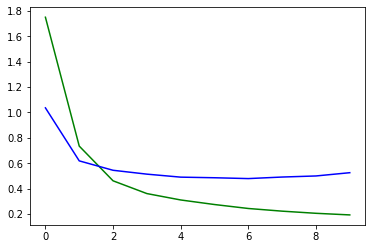

In [16]:
plt.plot(hist.epoch, hist.history['loss'], c='g');      # green - training loss
plt.plot(hist.epoch, hist.history['val_loss'], c='b');  # blue - test loss